<a href="https://colab.research.google.com/github/SantonioTheFirst/DataAnalysis/blob/main/IDA_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d christianlillelund/csgo-round-winner-classification

  0% 0.00/3.53M [00:00<?, ?B/s]
100% 3.53M/3.53M [00:00<00:00, 58.0MB/s]


In [3]:
!unzip csgo-round-winner-classification.zip

Archive:  csgo-round-winner-classification.zip
  inflating: csgo_round_snapshots.csv  


In [7]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# PCA & TSNE

In [ ]:
df = pd.read_csv('csgo_round_snapshots.csv')

In [ ]:
X = df.drop(columns=['round_winner'])
y = df.round_winner

In [ ]:
pca = PCA(n_components=3)

In [ ]:
num_cols = df.select_dtypes([np.number]).columns
cat_cols = df.drop(columns=['round_winner']).select_dtypes(['object', 'bool']).columns

In [ ]:
len(num_cols) + len(cat_cols)

96

In [ ]:
num_transformer = Pipeline(
    steps=[
           ('standartization', StandardScaler())
    ]
)


cat_transformer = Pipeline(
    steps=[
           ('encoding', OrdinalEncoder())
    ]
)


preprocessing = ColumnTransformer(
    [
     ('num', num_transformer, num_cols),
     ('cat', cat_transformer, cat_cols)
    ]
)


pipe = Pipeline(
    steps=[
           ('preprocessing', preprocessing)
    ]
)

In [ ]:
t = preprocessing.fit_transform(X)

In [ ]:
a = pca.fit_transform(t)

In [ ]:
df_1 = pd.DataFrame(a, columns=['pca_1', 'pca_2', 'pca_3'])

In [ ]:
df_1['round_winner'] = df['round_winner'].copy()

In [ ]:
df_1['c'] = df_1.round_winner.apply(lambda x : 'b' if x=='CT' else 'r')

In [ ]:
df_1

,pca_1,pca_2,pca_3,round_winner,c
0,-3.380626,-0.476657,3.753806,CT,b
1,-2.132955,-0.163551,2.996444,CT,b
2,-3.184426,-0.088402,1.336479,CT,b
3,-3.658575,0.160397,1.074640,CT,b
4,-2.863596,-0.994882,3.792377,CT,b
...,...,...,...,...,...
122405,-2.085069,1.246143,-2.560981,T,r
122406,-1.112257,-0.360974,3.115241,T,r
122407,3.263667,1.959387,-0.579797,T,r
122408,1.985540,2.497694,-0.338934,T,r


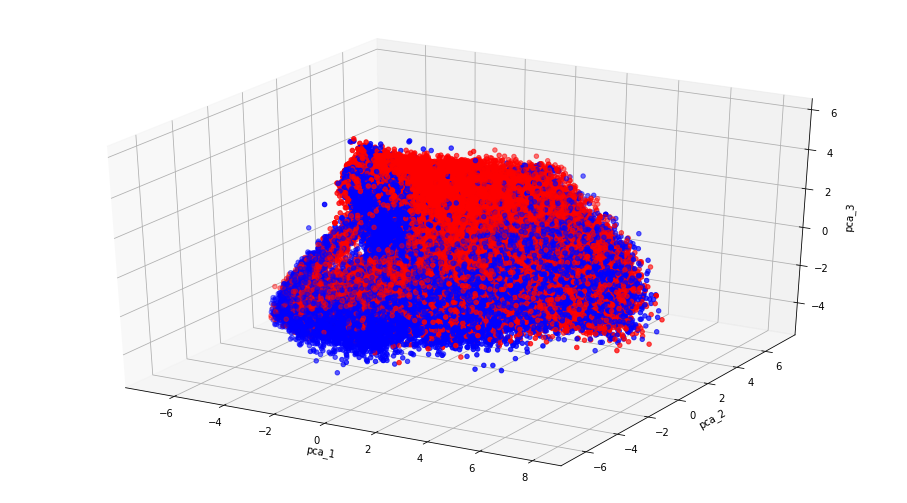

In [ ]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("pca_1")
ax.set_ylabel("pca_2")
ax.set_zlabel("pca_3")

ax.scatter(df_1['pca_1'], df_1['pca_2'], df_1['pca_3'], c=df_1['c'])

plt.show()

In [ ]:
pca = PCA(n_components=2)
b = pca.fit_transform(t)
df_2 = pd.DataFrame(b, columns=['pca_1', 'pca_2'])
df_2['round_winner'] = df['round_winner'].copy()

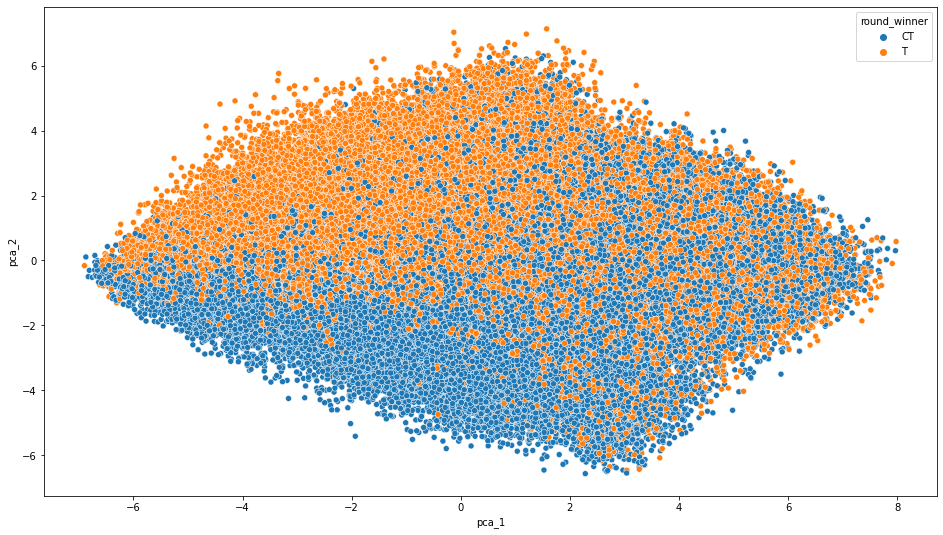

In [ ]:
fig = plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_2, x='pca_1', y='pca_2', hue='round_winner')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=16)

In [ ]:
oe = OrdinalEncoder()
df_1['round_winner'] = oe.fit_transform(df_1[['round_winner']])
df_2['round_winner'] = df_1['round_winner'].copy()

In [ ]:
X_1 = df_1.drop(columns=['round_winner', 'c'])
X_2 = df_2.drop(columns=['round_winner'])
y_1 = df_1.round_winner
y_2 = df_2.round_winner

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.3)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, n_estimators=200)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.73      0.72      0.72     18098
         1.0       0.73      0.74      0.73     18625

    accuracy                           0.73     36723
   macro avg       0.73      0.73      0.73     36723
weighted avg       0.73      0.73      0.73     36723



In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2)

In [ ]:
c = tsne.fit_transform(t)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
df_3 = pd.DataFrame(c, columns=['tsne_1', 'tsne_2'])

In [ ]:
df_3['round_winner'] = df_2['round_winner'].copy()

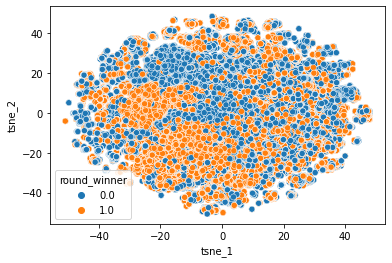

In [ ]:
sns.scatterplot(data=df_3, x='tsne_1', y='tsne_2', hue='round_winner')

# IMAGE QUANTIZATION

In [ ]:
from sklearn.datasets import load_sample_image
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from PIL import Image

In [ ]:
img = Image.open('stesha.jpg')

In [ ]:
img_arr = np.array(img) / 255.
img_arr_2d = np.reshape(img_arr, (img_arr.shape[0] * img_arr.shape[1], 3))
img_arr_2d.shape

(1228800, 3)

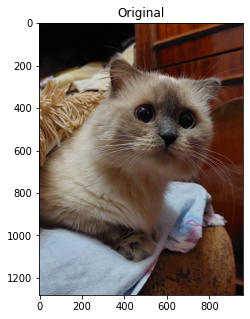

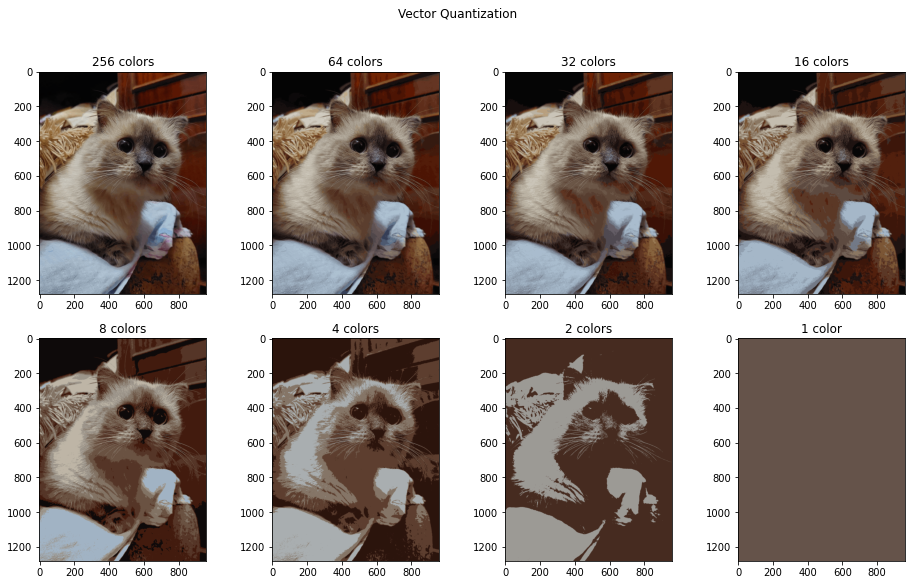

In [ ]:
fig = plt.figure(figsize=(5, 5))
plt.title('Original')
plt.imshow(img_arr)

n_colors = [256, 64, 32, 16, 8, 4, 2, 1]

fig, ax = plt.subplots(2, 4, figsize=(16, 9))
fig.suptitle('Vector Quantization')

for i, n in enumerate(n_colors):
    img_samples = shuffle(img_arr_2d, random_state=7, n_samples=10000)
    km = KMeans(n_clusters=n)
    km.fit(img_samples)
    labels = km.predict(img_arr_2d)
    # fig = plt.figure(figsize=(5, 5))
    idx = 0 if i < 4 else 1
    ax[idx][i % 4].set_title(f'{n} colors' if n > 1 else f'{n} color')
    ax[idx][i % 4].imshow(km.cluster_centers_[labels].reshape(img_arr.shape[0], img_arr.shape[1], -1))

# EM CLUSTERING

In [ ]:
a = np.zeros((1000, 3), dtype=np.float64)
for i in range(1000):
    a[i][0:2] = np.random.multivariate_normal(
        [2, 2], [
                 [1, -0.8],
                 [-0.8, 2]
                ]
    )
    a[i][2] = 0
b = np.zeros((1000, 3), dtype=np.float64)
for i in range(1000):
    b[i][0:2] = np.random.multivariate_normal(
        [0, -1],
        [
         [0.9, 0.3],
         [0.3, 2]
        ]
    )
    b[i][2] = 1
c = np.append(a, b)
c = c.reshape(2000, 3)

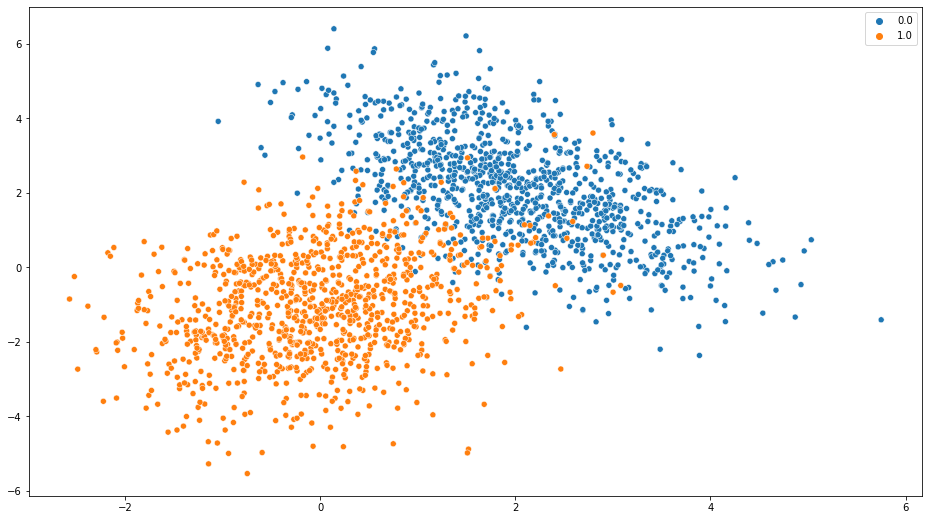

In [ ]:
fig = plt.figure(figsize=(16, 9))
sns.scatterplot(x=c[:, 0], y=c[:, 1], hue=c[:, 2])
plt.show()

In [ ]:
X = c[:, :2]

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=2)

In [ ]:
prediction = gm.fit_predict(X)

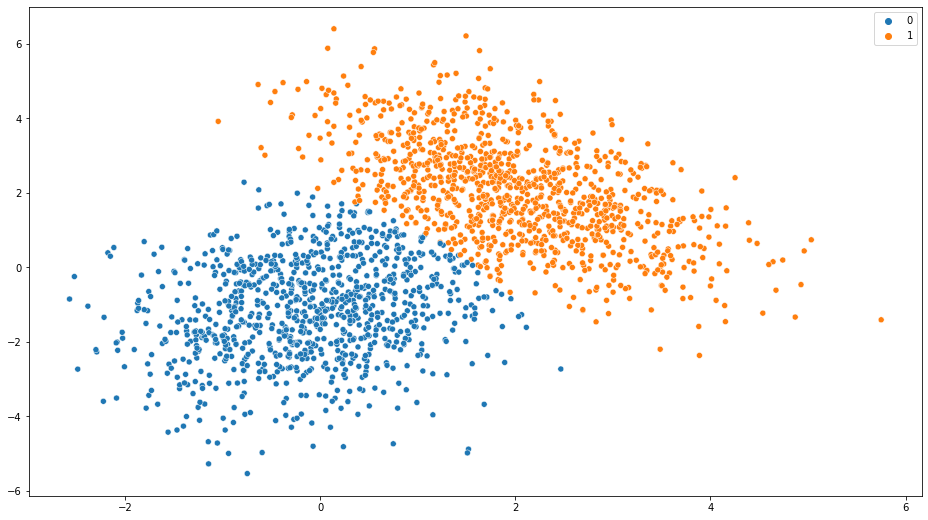

In [ ]:
fig = plt.figure(figsize=(16, 9))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=prediction)
plt.show()

In [ ]:
gm.weights_

array([0.48244678, 0.51755322])

In [ ]:
gm.covariances_

array([[[ 0.8023162 ,  0.3056886 ],
        [ 0.3056886 ,  1.97789211]],

       [[ 1.01535269, -0.76934971],
        [-0.76934971,  2.00664907]]])

# TEXT CLASSIFICATION

In [4]:
!kaggle datasets download -d blackmoon/russian-language-toxic-comments

  0% 0.00/1.49M [00:00<?, ?B/s]
100% 1.49M/1.49M [00:00<00:00, 24.5MB/s]


In [5]:
!unzip -q russian-language-toxic-comments.zip

In [8]:
df = pd.read_csv('labeled.csv')

In [9]:
df.head()

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [10]:
df.shape

(14412, 2)

In [47]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
import re
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [54]:
stop_words = stopwords.words('russian')
snowball = SnowballStemmer('russian')

def preprocess(data, stop_words, stemmer):
    # filtered = ' '.join([i for i in re.findall(r'[а-я]+', data.lower())])
    tokenized = word_tokenize(data.lower(), language='russian')
    without_punctuation = [i for i in tokenized if i not in string.punctuation]
    without_stopwords = [i for i in without_punctuation if i not in stop_words]
    stemmed_tokens = [stemmer.stem(i) for i in without_stopwords]
    return stemmed_tokens

In [59]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: preprocess(x, stop_words, snowball))

In [60]:
features = vectorizer.fit_transform(df['comment'])

In [68]:
X_train, X_test, y_train, y_test = train_test_split(features, df['toxic'], test_size=0.3, shuffle=True)

In [73]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=7)

In [74]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=7)

In [75]:
predictions = clf.predict(X_test)

In [76]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.66      1.00      0.79      2833
         1.0       0.00      0.00      0.00      1491

    accuracy                           0.66      4324
   macro avg       0.33      0.50      0.40      4324
weighted avg       0.43      0.66      0.52      4324



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
LogReg = LogisticRegression(random_state=7)

In [78]:
LogReg.fit(X_train, y_train)

LogisticRegression(random_state=7)

In [79]:
predictions = LogReg.predict(X_test)

In [80]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      2833
         1.0       0.91      0.57      0.70      1491

    accuracy                           0.83      4324
   macro avg       0.86      0.77      0.79      4324
weighted avg       0.85      0.83      0.82      4324



In [90]:
grid = GridSearchCV(
    LogisticRegression(
        random_state=7, max_iter=500
    ),
    param_grid={'C': [0.5, 1.0, 2.0, 3.0, 5.0, 12.0]},
    cv=5, scoring='recall'
)

In [91]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=500, random_state=7),
             param_grid={'C': [0.5, 1.0, 2.0, 3.0, 5.0, 12.0]},
             scoring='recall')

In [92]:
best_estimator = grid.best_estimator_

In [95]:
grid.best_params_

{'C': 12.0}

In [96]:
best_estimator.fit(X_train, y_train)

LogisticRegression(C=12.0, max_iter=500, random_state=7)

In [97]:
predictions = best_estimator.predict(X_test)

In [98]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90      2833
         1.0       0.89      0.70      0.78      1491

    accuracy                           0.87      4324
   macro avg       0.87      0.83      0.84      4324
weighted avg       0.87      0.87      0.86      4324

